In [1]:
import os

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import torchvision
from tqdm.auto import tqdm

from custom_waterworld import GIFWriter

In [2]:
sns.set_style("darkgrid")

In [ ]:
create_gifs = False

In [3]:
df_run = pd.read_csv("dataframes/single_controls_agent.csv", index_col=0)
df_run

,agent,i,state,action,reward
0,pursuer_0,1,[1. 1. 1. 1. 1. ...,[0. 0.],0.00
1,pursuer_0,2,[1. 1. 1. 1. 1. ...,[0. 0.],0.00
2,pursuer_0,3,[1. 1. 1. 1. 1. ...,[0. 0.],0.00
3,pursuer_0,4,[1. 1. 1. 1. 1. ...,[0. 0.],0.00
4,pursuer_0,5,[1. 1. 1. 1. 1. ...,[0. 0.],0.00
...,...,...,...,...,...
508,pursuer_0,509,[ 1. 1. 1. 1. ...,[0.30901685 0.95105654],-0.01
509,pursuer_0,510,[ 1. 1. 1. 1. ...,[-0.9135456 0.40673634],-0.01
510,pursuer_0,511,[1. 1. 1. 1. 1...,[ 0.9135457 -0.40673605],-0.01
511,pursuer_0,512,[ 1. 1. 1. 1. ...,[0.9781476 0.20791171],9.98


In [4]:
def parse_actions(row):
    actions = row["action"]
    action0, action1 = actions[1:-1].split()
    return float(action0), float(action1)

In [5]:
def parse_state(row):
    state = row["state"]
    return tuple(map(float, state[1:-1].split()))

In [6]:
df_run[["action0", "action1"]] = df_run.apply(parse_actions, axis=1, result_type="expand")
out = df_run.apply(parse_state, axis=1, result_type="expand")

n_sensors = (len(out.columns) - 2) / 8
assert n_sensors == int(n_sensors), f"Unable to calculate number of sensors! Got {n_sensors}"
n_sensors = int(n_sensors)

cols = {c: f"obs{c}" for c in out.columns}
out = out.rename(columns=cols)
df_run = pd.concat([df_run, out], axis=1)

del out, cols

print(f"Found {n_sensors} sensors")
df_run = df_run.drop(columns=["state", "action"])
df_run

Found 30 sensors


,agent,i,reward,action0,action1,obs0,obs1,obs2,obs3,obs4,...,obs232,obs233,obs234,obs235,obs236,obs237,obs238,obs239,obs240,obs241
0,pursuer_0,1,0.00,0.000000,0.000000,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,pursuer_0,2,0.00,0.000000,0.000000,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,pursuer_0,3,0.00,0.000000,0.000000,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,pursuer_0,4,0.00,0.000000,0.000000,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,pursuer_0,5,0.00,0.000000,0.000000,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
508,pursuer_0,509,-0.01,0.309017,0.951057,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
509,pursuer_0,510,-0.01,-0.913546,0.406736,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
510,pursuer_0,511,-0.01,0.913546,-0.406736,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
511,pursuer_0,512,9.98,0.978148,0.207912,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
df_run[df_run["reward"] > 0]

,agent,i,reward,action0,action1,obs0,obs1,obs2,obs3,obs4,...,obs232,obs233,obs234,obs235,obs236,obs237,obs238,obs239,obs240,obs241
68,pursuer_0,69,9.99,0.913545,0.406737,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
74,pursuer_0,75,9.98,0.104529,-0.994522,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
104,pursuer_0,105,9.99,0.309018,-0.951056,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
109,pursuer_0,110,9.98,0.000000,0.000000,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
207,pursuer_0,208,9.99,0.669131,-0.743144,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
211,pursuer_0,212,9.98,0.669131,-0.743144,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
229,pursuer_0,230,9.99,-0.913546,0.406736,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
230,pursuer_0,231,9.98,-0.669131,0.743144,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
260,pursuer_0,261,9.99,0.978148,0.207912,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
261,pursuer_0,262,9.98,0.000000,0.000000,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
pursuer_0 = df_run[df_run["agent"] == "pursuer_0"]
pursuer_0 = pursuer_0.reset_index().reset_index()
pursuer_0 = pursuer_0.rename(columns={"level_0": "frame"})
pursuer_0 = pursuer_0.set_index("index")

pursuer_1 = df_run[df_run["agent"] == "pursuer_1"]
pursuer_1 = pursuer_1.reset_index().reset_index()
pursuer_1 = pursuer_1.rename(columns={"level_0": "frame"})
pursuer_1 = pursuer_1.set_index("index")

df_run = pd.concat([pursuer_0, pursuer_1]).sort_index()
df_run

,frame,agent,i,reward,action0,action1,obs0,obs1,obs2,obs3,...,obs232,obs233,obs234,obs235,obs236,obs237,obs238,obs239,obs240,obs241
index,,,,,,,,,,,,,,,,,,,,,
0,0,pursuer_0,1,0.00,0.000000,0.000000,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,pursuer_0,2,0.00,0.000000,0.000000,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,pursuer_0,3,0.00,0.000000,0.000000,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,pursuer_0,4,0.00,0.000000,0.000000,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,pursuer_0,5,0.00,0.000000,0.000000,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
508,508,pursuer_0,509,-0.01,0.309017,0.951057,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
509,509,pursuer_0,510,-0.01,-0.913546,0.406736,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
510,510,pursuer_0,511,-0.01,0.913546,-0.406736,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [9]:
renames = {
    "action0": "horizontal_thrust",
    "action1": "vertical_thrust"
}

for obs in filter(lambda c: c.startswith("obs"), df_run.columns):
    num = int(obs[3:])
    new_name = None
    if num < n_sensors:
        new_name = f"distance_obstacle_{num}"
    elif num < n_sensors * 2:
        new_name = f"distance_barrier_{num - n_sensors}"
    elif num < n_sensors * 3:
        new_name = f"distance_food_{num - n_sensors * 2}"
    elif num < n_sensors * 4:
        new_name = f"speed_food_{num - n_sensors * 3}"
    elif num < n_sensors * 5:
        new_name = f"distance_poison_{num - n_sensors * 4}"
    elif num < n_sensors * 6:
        new_name = f"speed_poison_{num - n_sensors * 5}"
    elif num < n_sensors * 7:
        new_name = f"distance_pursuer_{num - n_sensors * 6}"
    elif num < n_sensors * 8:
        new_name = f"speed_pursuer_{num - n_sensors * 7}"
    elif num == n_sensors * 8:
        new_name = "collision_food"
    elif num == n_sensors * 8 + 1:
        new_name = "collision_poison"
    assert new_name is not None
    renames[obs] = new_name
df_run = df_run.rename(columns=renames)

df_run["total_thrust"] = np.sqrt(df_run["horizontal_thrust"]**2 + df_run["vertical_thrust"]**2)

# Cumulative Rewards
df_run["cumulative_reward"] = df_run.groupby(by=["agent"])["reward"].cumsum()

df_run

,frame,agent,i,reward,horizontal_thrust,vertical_thrust,distance_obstacle_0,distance_obstacle_1,distance_obstacle_2,distance_obstacle_3,...,speed_pursuer_24,speed_pursuer_25,speed_pursuer_26,speed_pursuer_27,speed_pursuer_28,speed_pursuer_29,collision_food,collision_poison,total_thrust,cumulative_reward
index,,,,,,,,,,,,,,,,,,,,,
0,0,pursuer_0,1,0.00,0.000000,0.000000,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00
1,1,pursuer_0,2,0.00,0.000000,0.000000,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00
2,2,pursuer_0,3,0.00,0.000000,0.000000,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00
3,3,pursuer_0,4,0.00,0.000000,0.000000,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00
4,4,pursuer_0,5,0.00,0.000000,0.000000,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
508,508,pursuer_0,509,-0.01,0.309017,0.951057,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,161.50
509,509,pursuer_0,510,-0.01,-0.913546,0.406736,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,161.49
510,510,pursuer_0,511,-0.01,0.913546,-0.406736,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,161.48


In [10]:
def frames_to_gif(output_name:str, frames_path: str, framerate: int = 15):
    writer = GIFWriter(framerate, output_name)
    for root, _, file in os.walk(frames_path):
        frame_path = os.path.join(root, file)
        frame = torchvision.io.read_image(frame_path)
        writer.write(frame)
    writer.close()

In [11]:
df_plot = pd.melt(df_run, id_vars=["agent", "frame"])

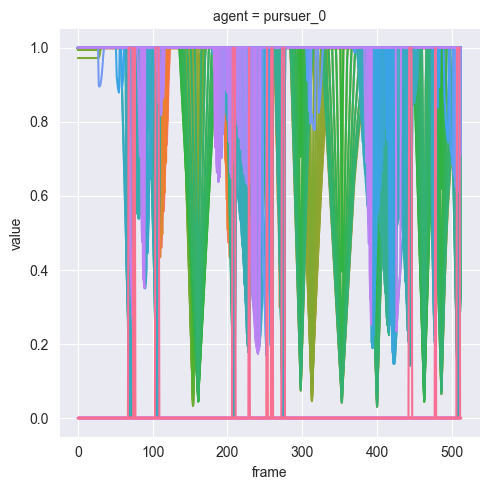

In [12]:
target_cols = (
    set(df_run.columns)
    - {"frame", "agent", "i", "reward", "cumulative_reward"}
    - set(filter(lambda c: c.endswith("thrust"), df_run.columns))
    - set(filter(lambda c: c.startswith("speed"), df_run.columns))
)
to_plot = df_plot[df_plot["variable"].isin(target_cols)]
g = sns.relplot(
    x="frame",
    y="value",
    col="agent",
    hue="variable",
    data=to_plot,
    kind="line",
    legend="brief" if len(target_cols) <= 10 else False,
)

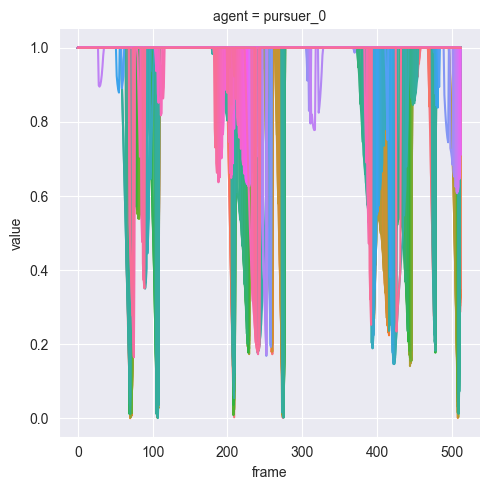

In [24]:
target_cols = set(filter(lambda c: c.startswith("distance_food") or c.startswith("distance_poison"), df_run.columns))
to_plot = df_plot[df_plot["variable"].isin(target_cols)]
g = sns.relplot(x="frame", y="value", col="agent", hue="variable",
            data=to_plot,
            kind="line", legend="brief" if len(target_cols) <= 10 else False
)

In [25]:
if create_gifs:
    path = "./frames/obs/"
    if not os.path.exists(path):
        os.makedirs(path)
    min_y = -0.025
    max_y = to_plot["value"].max() + 0.025
    min_x = df_run["frame"].min() - 1
    max_x = df_run["frame"].max() + 1
    for frame in tqdm(range(df_run["frame"].min(), df_run["frame"].max() + 1)):
        g = sns.relplot(
            x="frame",
            y="value",
            col="agent",
            hue="variable",
            data=to_plot.query("frame <= @frame"),
            kind="line",
            legend=None
        )
        plt.xlim(min_x, max_x)
        plt.ylim(min_y, max_y)
        plt.tight_layout()
        g.savefig(f"{path}{frame}.jpg")
        plt.close()

  0%|          | 0/513 [00:00<?, ?it/s]

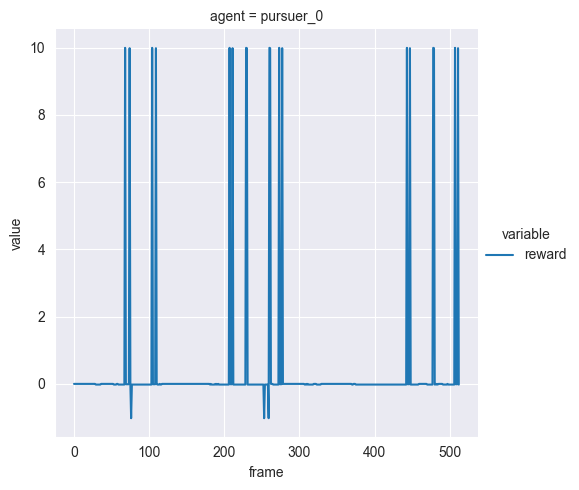

In [15]:
target_cols = ["reward"]
to_plot = df_plot[df_plot["variable"].isin(target_cols)]
g = sns.relplot(x="frame", y="value", col="agent", hue="variable",
            data=to_plot,
            kind="line", legend="brief" if len(target_cols) <= 10 else False
)

In [16]:
if create_gifs:
    path = "./frames/reward/"
    if not os.path.exists(path):
        os.makedirs(path)
    min_y = -1
    max_y = to_plot["value"].max() * 1.1
    min_x = df_run["frame"].min() - 1
    max_x = df_run["frame"].max() + 1
    for frame in tqdm(range(df_run["frame"].min(), df_run["frame"].max() + 1)):
        g = sns.relplot(
            x="frame",
            y="value",
            col="agent",
            hue="variable",
            data=to_plot.query("frame <= @frame"),
            kind="line",
            legend=None,
        )
        plt.xlim(min_x, max_x)
        plt.ylim(min_y, max_y)
        plt.tight_layout()
        g.savefig(f"{path}{frame}.jpg")
        plt.close()

  0%|          | 0/513 [00:00<?, ?it/s]

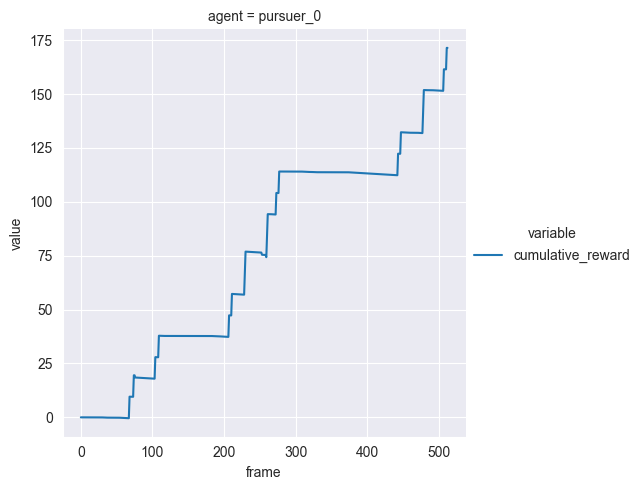

In [22]:
target_cols = ["cumulative_reward"]
to_plot = df_plot[df_plot["variable"].isin(target_cols)]
g = sns.relplot(x="frame", y="value", col="agent", hue="variable",
            data=to_plot,
            kind="line", legend="brief" if len(target_cols) <= 10 else False
)

In [23]:
if create_gifs:
    path = "./frames/cumulative_reward/"
    if not os.path.exists(path):
        os.makedirs(path)
    min_y = -5
    max_y = to_plot["value"].max() * 1.1
    min_x = df_run["frame"].min() - 1
    max_x = df_run["frame"].max() + 1
    for frame in tqdm(range(df_run["frame"].min(), df_run["frame"].max() + 1)):
        g = sns.relplot(
            x="frame",
            y="value",
            col="agent",
            hue="variable",
            data=to_plot.query("frame <= @frame"),
            kind="line",
            legend=None
        )
        plt.xlim(min_x, max_x)
        plt.ylim(min_y, max_y)
        plt.tight_layout()
        g.savefig(f"{path}{frame}.jpg")
        plt.close()

  0%|          | 0/513 [00:00<?, ?it/s]

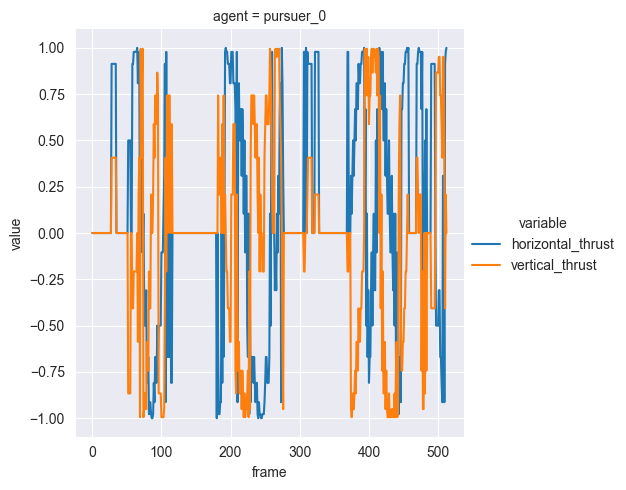

In [26]:
target_cols = set(filter(lambda c: c.endswith("thrust"), df_run.columns)) - {"total_thrust"}
to_plot = df_plot[df_plot["variable"].isin(target_cols)]
g = sns.relplot(x="frame", y="value", col="agent", hue="variable",
            data=to_plot,
            kind="line", legend="brief" if len(target_cols) <= 10 else False
)

In [28]:
if create_gifs:
    path = "./frames/thrust/"
    if not os.path.exists(path):
        os.makedirs(path)
    min_y = to_plot["value"].min() * 1.1
    max_y = to_plot["value"].max() * 1.1
    min_x = df_run["frame"].min() - 1
    max_x = df_run["frame"].max() + 1
    for frame in tqdm(range(df_run["frame"].min(), df_run["frame"].max() + 1)):
        g = sns.relplot(
            x="frame",
            y="value",
            col="agent",
            hue="variable",
            data=to_plot.query("frame <= @frame"),
            kind="line",
            aspect=1,
        )
        sns.move_legend(g, "upper right", frameon=True)
        plt.xlim(min_x, max_x)
        plt.ylim(min_y, max_y)
        plt.tight_layout()
        g.savefig(f"{path}{frame}.jpg")
        plt.close()

  0%|          | 0/513 [00:00<?, ?it/s]